Cuales son las habilidades con más demanda para los 3 roles de data mas populares?

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_US = df[df['job_country']=='United States']

In [6]:
df_skills = df_US.explode('job_skills')

In [15]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)

In [16]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

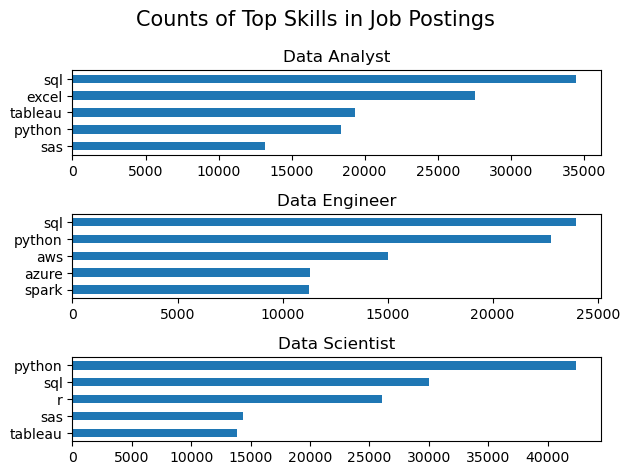

In [21]:
fig, ax= plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot=df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh', x = 'job_skills', y = 'skill_count', ax = ax[i], title=job_title)
    plt.tight_layout()
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
plt.tight_layout()
plt.show()


In [23]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [27]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_percent'] = df_skills_perc ['skill_count'] / df_skills_perc['jobs_total'] *100

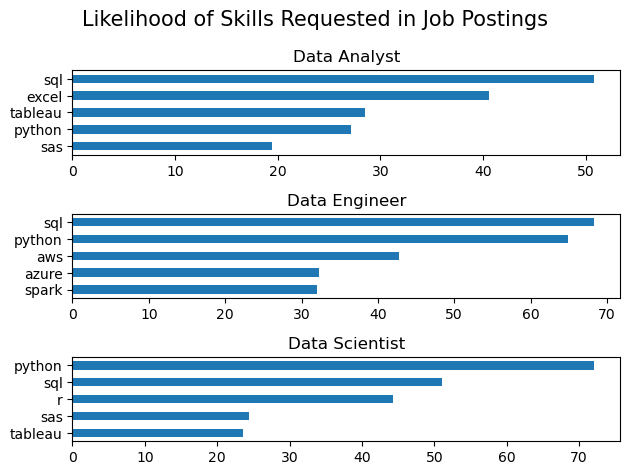

In [29]:
fig, ax= plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot=df_skills_perc[df_skills_perc['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh', x = 'job_skills', y = 'skill_percent', ax = ax[i], title=job_title)
    plt.tight_layout()
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Likelihood of Skills Requested in Job Postings', fontsize=15)
plt.tight_layout()
plt.show()
